# <font color = lightcoral>EDA Baseline (StartOver)
>    
>Using AECID as-is

## <font color = grey> Admin

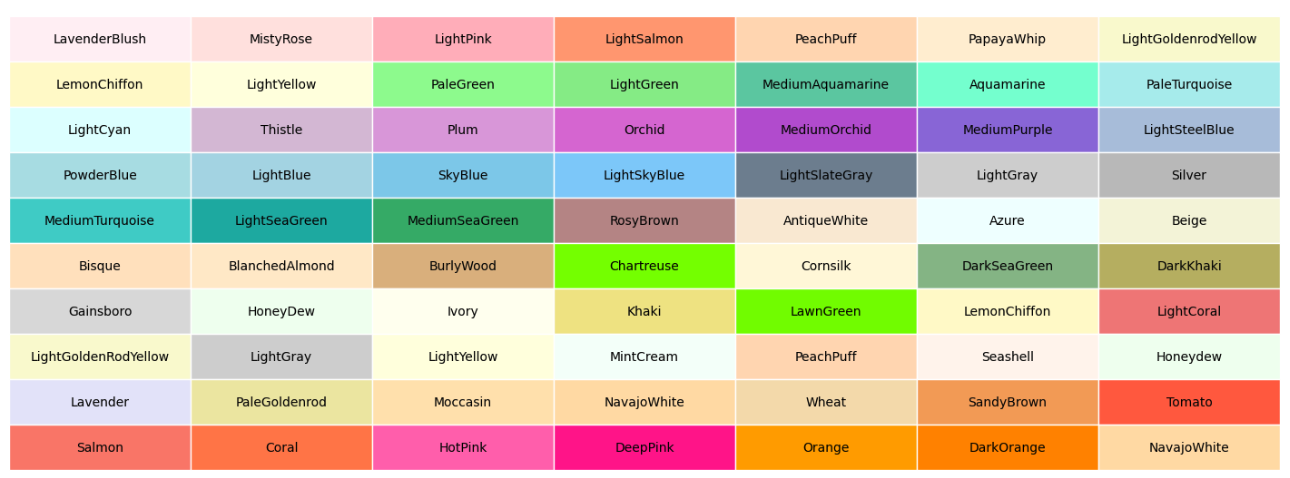

In [22]:
import pandas as pd
import os
import gzip
import time
import warnings
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [23]:
# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

Base directory set to: /root


___
# <font color = lightsalmon> 0. About the Data | seq_id

#### <font color = blue>R02-M1-N0-C:J12-U11

><font color = sandybrown>R02: This likely represents a Rack number.
>
>>R02 suggests it is Rack number 2. Racks house multiple midplanes, modules, and nodes.
>
><font color = sandybrown>M1: This likely represents a Midplane or Module within the rack.
>
>>M1 indicates Midplane or Module number 1 within Rack 2.
>
><font color = sandybrown>N0: This likely represents a Node within the midplane or module.
>
>>N0 suggests it is Node number 0 within Midplane 1 of Rack 2.
>
><font color = sandybrown>C
>> : This part indicates further subdivisions or components within the node:
>
>><font color = lightseagreen>C: might denote a specific Component within the node.
>
>><font color = lightseagreen>J12: This likely represents a Junction or Jack number.
>
>><font color = lightseagreen>J12 suggests Junction number 12 within the component.
>
>><font color = lightseagreen>U11: This likely represents a Unit number within the junction.
>
>><font color = lightseagreen>U11 indicates Unit number 11 within Junction 12.

___
# <font color = darkkhaki> 1. Import Data

## <font color = lightsteelblue> Import

In [24]:
# !pip install wget

In [25]:
# import pandas as pd
# import time
# import os
# import wget

# # Start timing
# start_time = time.time()

# # Define the URL and the target directory
# url = 'http://0b4af6cdc2f0c5998459-c0245c5c937c5dedcca3f1764ecc9b2f.r43.cf2.rackcdn.com/hpc4/bgl2.gz'
# target_directory = os.path.join(base_dir, '02.Baseline_Models/01.StartOver_AECID_Baseline/bgl_cfdr')

# # Ensure the target directory exists
# if not os.path.exists(target_directory):
#     os.makedirs(target_directory)

# # Download the file
# filename = wget.download(url, out=target_directory)
# print(f"\nDownloaded file: {filename}")

# # Unzip the file
# downloaded_file = os.path.join(target_directory, 'bgl2.gz')
# os.system(f'gunzip {downloaded_file}')

# print(f"Unzipped file in {target_directory}")

# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTime taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

___
## <font color = lightsteelblue> Change Operation Directory

In [26]:
# Define the target directory
target_directory = os.path.join(base_dir, '02.Baseline_Models/01.StartOver_AECID_Baseline')

# Change to the target directory
os.chdir(target_directory)
print(f"Changed directory to: {os.getcwd()}")

Changed directory to: /root/02.Baseline_Models/01.StartOver_AECID_Baseline


___
## <font color = lightsteelblue> Sneak Peak

In [27]:
import os
import time

# Define the file path
file_path = os.path.join(target_directory, 'bgl_cfdr/bgl2')

# Initialize counters
total_lines = 0
lines_starting_with_hyphen = 0
lines_not_starting_with_hyphen = 0

# Start timing
start_time = time.time()

# Count the number of lines and categorize them
with open(file_path, 'rt') as f:
    for line in f:
        total_lines += 1
        if line.startswith('-'):
            lines_starting_with_hyphen += 1
        else:
            lines_not_starting_with_hyphen += 1

# Print the results
print(f'Total number of rows: {total_lines}')
print(f'Number of rows starting with "-": {lines_starting_with_hyphen}')
print(f'Number of rows not starting with "-": {lines_not_starting_with_hyphen}')

print("\n" + "_"*100)

# Second section: Print the first 10 lines of the file
print("\nFirst 10 lines of the file:\n" + "_"*100)

# Read the file again to print the first 10 lines
with open(file_path, 'rt') as f:
    lines = f.readlines()

# Print the first 10 lines
for line in lines[:10]:
    print(line.strip())

print("\n" + "_"*100)

# Third section: Process the file to find the first 10 lines that do not start with '-'

# Initialize counters and storage for exception lines
total_lines = 0
lines_starting_with_hyphen = 0
lines_not_starting_with_hyphen = 0
exception_lines = []

# Count the number of lines and categorize them
with open(file_path, 'rt') as f:
    for line in f:
        total_lines += 1
        if line.startswith('-'):
            lines_starting_with_hyphen += 1
        else:
            lines_not_starting_with_hyphen += 1
            if len(exception_lines) < 10:
                exception_lines.append(line.strip())

# Print the results for the file
print(f'Total number of rows: {total_lines}')
print(f'Number of rows starting with "-": {lines_starting_with_hyphen}')
print(f'Number of rows not starting with "-": {lines_not_starting_with_hyphen}')

print("\n" + "_"*100)
# Print the first 10 exception lines
print("\nFirst 10 lines that do not start with '-':")
print("\n" + "_"*100)

for i, exception_line in enumerate(exception_lines, 1):
    print(f"{i}: {exception_line}")

# End timing
end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)

Total number of rows: 4747963
Number of rows starting with "-": 4399265
Number of rows not starting with "-": 348698

____________________________________________________________________________________________________

First 10 lines of the file:
____________________________________________________________________________________________________
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.527847 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.675872 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.823719 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.4

___
# <font color = darkkhaki> 2. Parsing

## <font color = lightsteelblue> Review Templates

In [28]:
# Start timing
start_time = time.time()

file_path = os.path.join(target_directory, 'templates/BGL_templates.csv')

# Load and read the first 10 lines of the template file
with open(file_path, 'r') as f:
    lines = [next(f).strip() for _ in range(10)]

# Print the first 10 lines to understand the structure
print("\nFirst 10 lines of the template file:\n" + "_"*100)
for i, line in enumerate(lines, start=1):
    print(f"Line {i}: {line}")

end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


First 10 lines of the template file:
____________________________________________________________________________________________________
Line 1: <*>:<*> <*>:<*> <*>:<*> <*>:<*>
Line 2: <*> <*> <*> BGLERR_IDO_PKT_TIMEOUT connection lost to node/link/service card
Line 3: <*> correctable errors exceeds threshold (iar <*> lr <*>
Line 4: <*> ddr error(s) detected and corrected on rank <*> symbol <*> over <*> seconds
Line 5: <*> ddr errors(s) detected and corrected on rank <*> symbol <*>, bit <*>
Line 6: <*> double-hummer alignment exceptions
Line 7: <*> exited abnormally due to signal: Aborted
Line 8: <*> exited normally with exit code <*>
Line 9: <*> floating point alignment exceptions
Line 10: <*> L3 <*> error(s) (dcr <*> detected and corrected over <*> seconds

____________________________________________________________________________________________________

Time taken: 0.19 seconds

____________________________________________________________________________________________________

## <font color = lightsteelblue> Parsing

In [29]:
# # Start timing
# start_time = time.time()

# %run bgl_parse.py

# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTime taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

___
## <font color = lightsteelblue> EDA of Parsed File

In [30]:
import os
import time
import pandas as pd

# Define the target directory and file path
file_path = os.path.join(target_directory, 'bgl_cfdr/parsed.csv')

# Start timing
start_time = time.time()

# ********** Section 1: Load and Display Basic Information **********

print("\n" + "*"*100)
print("**************** Section 1: Load and Display Basic Information ******************")
print("*"*100 + "\n")

# Load the data into a DataFrame
df = pd.read_csv(file_path, sep=';')

# Display basic information about the DataFrame
print("Basic Information:")
print(df.info())

print("\n" + "-"*100)

# ********** Section 2: Display First Few Lines **********

print("\n" + "*"*100)
print("**************** Section 2: Display First Few Lines **************************")
print("*"*100 + "\n")

# Display the first few lines of the DataFrame
print("\nFirst few lines:")
print(df.head())

print("\n" + "-"*100)

# ********** Section 3: Count Unique Values in Each Column **********

print("\n" + "*"*100)
print("**************** Section 3: Count Unique Values in Each Column ******************")
print("*"*100 + "\n")

# Count unique values in each column
print("\nUnique Values Count:")
print(df.nunique())

print("\n" + "-"*100)

# ********** Section 4: Display Random 10 Rows where eventlabel != Normal **********

print("\n" + "*"*100)
print("**************** Section 4: Display Random 10 Rows where eventlabel != Normal **********")
print("*"*100 + "\n")

# Filter rows where eventlabel is not 'Normal'
anomalous_rows = df[df['eventlabel'] != 'Normal']

# If there are fewer than 10 rows, display all of them; otherwise, display a random sample of 10 rows
if len(anomalous_rows) < 10:
    sample_anomalous_rows = anomalous_rows
else:
    sample_anomalous_rows = anomalous_rows.sample(n=10)

print("\nRandom 10 rows where eventlabel is not 'Normal':")
display(sample_anomalous_rows)

print("\n" + "-"*100)

# ********** Section 5: Count of Rows for label and eventlabel **********

print("\n" + "*"*100)
print("**************** Section 5: Count of Rows for label and eventlabel ******************")
print("*"*100 + "\n")

# Count of eventlabel grouped as 'Normal' and 'Not-Normal'
df['eventlabel_grouped'] = df['eventlabel'].apply(lambda x: 'Normal' if x == 'Normal' else 'Not-Normal')
grouped_eventlabel_counts = df['eventlabel_grouped'].value_counts()
total_eventlabel = grouped_eventlabel_counts.sum()
not_normal_percentage = (grouped_eventlabel_counts['Not-Normal'] / total_eventlabel) * 100

print("\nCount of eventlabel grouped as 'Normal' and 'Not-Normal':")
print("\ni.e this is the data that has been manually tagged by SysAdmins as being Normal, ie '-' or being Anomalous; ie not '-'")
print("\nNote the SysAdmins did not specifically mark a value called 'Anomaly'. Rather the value of the first column (which is no -) is placed in the eventlabel field")
print(f"Not-Normal: {grouped_eventlabel_counts['Not-Normal']} ({not_normal_percentage:.2f}%)")
print(f"Normal: {grouped_eventlabel_counts['Normal']} ({100 - not_normal_percentage:.2f}%)")

print("\n" + "-"*100)

# Count of rows for each label
label_counts = df['label'].value_counts()
total_labels = label_counts.sum()
anomaly_percentage = (label_counts['Anomaly'] / total_labels) * 100

print("\nCount of rows for each label (set for seq_id based on anomalous_sequences):")
print("\ni.e this is the value of the 'LABEL' column which is tagged by the parsing script):")
print("\nNote, this is a blanket assignment of the Anomaly flag based on if the seq_id had ANY anomalous row")
print(f"Anomaly: {label_counts['Anomaly']} ({anomaly_percentage:.2f}%)")
print(f"Normal: {label_counts['Normal']} ({100 - anomaly_percentage:.2f}%)")

print("\n" + "-"*100)

# Count of rows for each eventlabel
eventlabel_counts = df['eventlabel'].value_counts()
print("\nCount of rows for each eventlabel (set = to value in first char of raw data):")
display(eventlabel_counts.head(10))

print("\n" + "-"*100)


# ********** Section 6: Count of seq_ids **********

print("\n" + "*"*100)
print("**************** Section 6: Count of seq_ids ******************************************")
print("*"*100 + "\n")

# Total number of seq_ids
total_seq_ids = df['seq_id'].nunique()
print("\nTotal number of seq_ids:")
print(total_seq_ids)

# Number of seq_ids having more than 1 distinct value in eventlabel
seq_id_eventlabel_counts = df.groupby('seq_id')['eventlabel'].nunique()
multiple_eventlabel_seq_ids = (seq_id_eventlabel_counts > 1).sum()
single_eventlabel_seq_ids = (seq_id_eventlabel_counts == 1).sum()

print("\nCount of seq_ids with 'single' and 'multiple' distinct eventlabels:")
print(f"Single eventlabel: {single_eventlabel_seq_ids}")
print(f"Multiple eventlabels: {multiple_eventlabel_seq_ids}")

# Additional metric: Count of distinct 'single' seq_ids with 'Normal' or 'Anomaly' in the 'label' field
single_eventlabel_seq_ids_list = seq_id_eventlabel_counts[seq_id_eventlabel_counts == 1].index
single_eventlabel_df = df[df['seq_id'].isin(single_eventlabel_seq_ids_list)]

single_normal_seq_ids = single_eventlabel_df[single_eventlabel_df['label'] == 'Normal']['seq_id'].nunique()
single_anomaly_seq_ids = single_eventlabel_df[single_eventlabel_df['label'] == 'Anomaly']['seq_id'].nunique()

print(f"\nCount of distinct 'single' eventlabel seq_ids with 'Normal' label: {single_normal_seq_ids}")
print(f"Count of distinct 'single' eventlabel seq_ids with 'Anomaly' label: {single_anomaly_seq_ids}")

print("\n" + "-"*100)

# ********** Section 7: Summary of Relationships **********

print("\n" + "*"*100)
print("**************** Section 7: Summary of Relationships **********************************")
print("*"*100 + "\n")

label_eventlabel_summary = df.groupby(['eventlabel', 'label']).size().reset_index(name='count')
label_eventlabel_summary_sorted = label_eventlabel_summary.sort_values(by='count', ascending=False)

print("\nSummary of relationships between eventlabel, label, and count (sorted desc):")
print(label_eventlabel_summary_sorted.head(100))  # Display only top 100 for brevity

print("\n" + "-"*100)

# ********** Section 8: Analyze Top 10 seq_id **********

# ********** Section 8: Analyze Top 10 seq_id **********

print("\n" + "*"*100)
print("**************** Section 8: Analyze Top 10 seq_id ******************")
print("*"*100 + "\n")

print("\nSeq_IDs are ranked by total number of records descending:")
print("\nWe track 4 values for each seq_id.")
print("\n(1) event_label_normal is based on the expert/manual/sysadmin tagged values")
print("\n(2) event_label_not_normal is a collection of all values that are not '-' as the sys admins did not explicitely have a value called 'Anomaly")
print("\n(3) label_normal is based on the parsed used which tags all the records for a seq_id if there even a single record in label_not-normal")
print("\n(4) label_anomaly is based on the parser used which assign a value of 'Anomaly'")

print("\n" + "-"*100)

# Aggregate the counts for each seq_id
seq_id_counts = df['seq_id'].value_counts().head(10)

# Initialize a list to store the results
top_seq_id_analysis = []

# Loop through the top 10 seq_id
for seq_id in seq_id_counts.index:
    # Filter the DataFrame for the current seq_id
    seq_id_df = df[df['seq_id'] == seq_id]
    
    # Calculate the counts for event labels
    event_label_normal_count = seq_id_df[seq_id_df['eventlabel'] == 'Normal'].shape[0]
    event_label_not_normal_count = seq_id_df[seq_id_df['eventlabel'] != 'Normal'].shape[0]
    
    # Calculate the counts for labels
    label_normal_count = seq_id_df[seq_id_df['label'] == 'Normal'].shape[0]
    label_anomaly_count = seq_id_df[seq_id_df['label'] == 'Anomaly'].shape[0]
    
    # Append the results to the list
    top_seq_id_analysis.append({
        'seq_id': seq_id,
        'total_records': seq_id_counts[seq_id],
        'expert_label_normal': event_label_normal_count,
        'expert_label_not_normal': event_label_not_normal_count,
        'parser_label_normal': label_normal_count,
        'parser_label_anomaly': label_anomaly_count
    })

# Convert the list to a DataFrame for display
top_seq_id_df = pd.DataFrame(top_seq_id_analysis)

# Display the results
print("\nTop 10 seq_id Analysis (ranked by total number of records descending):")
display(top_seq_id_df)

print("\n" + "-"*100)

# ********** Section 8b: Analyze Top 10 seq_id by 'expert_label_not_normal' **********

print("\n" + "*"*100)
print("**************** Section 8b: Analyze Top 10 seq_id by 'expert_label_not_normal' ******************")
print("*"*100 + "\n")

# Sort the DataFrame by 'expert_label_not_normal' descending and get the top 10
top_seq_id_by_expert_label_not_normal = top_seq_id_df.sort_values(by='expert_label_not_normal', ascending=False).head(10)

# Display the results
print("\nTop 10 seq_id Analysis (ranked by 'expert_label_not_normal' descending):")
display(top_seq_id_by_expert_label_not_normal)

print("\n" + "-"*100)

# ********************************** END ************************************************

# End timing
end_time = time.time()
duration = end_time - start_time
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "-"*100)



****************************************************************************************************
**************** Section 1: Load and Display Basic Information ******************
****************************************************************************************************

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747963 entries, 0 to 4747962
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   event_type  int64  
 2   seq_id      object 
 3   time        float64
 4   label       object 
 5   eventlabel  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 217.3+ MB
None

----------------------------------------------------------------------------------------------------

****************************************************************************************************
**************** Section 2: Display First Few Lines **************************
*******************************

,id,event_type,seq_id,time,label,eventlabel
237838,237839,15,R30-M0-N9-C:J16-U01,1.118512e+09,Anomaly,KERNDTLB
266920,266921,15,R30-M0-N9-C:J16-U01,1.118517e+09,Anomaly,KERNDTLB
297375,297376,15,R30-M0-N9-C:J16-U01,1.118521e+09,Anomaly,KERNDTLB
3368808,3368809,62,R56-M0-N8-I:J18-U11,1.126452e+09,Anomaly,APPSEV
249543,249544,15,R30-M0-N9-C:J16-U01,1.118514e+09,Anomaly,KERNDTLB
306687,306688,15,R30-M0-N9-C:J16-U01,1.118523e+09,Anomaly,KERNDTLB
3378399,3378400,62,R01-M1-N0-I:J18-U11,1.126773e+09,Anomaly,APPSEV
302679,302680,15,R30-M0-N9-C:J16-U01,1.118522e+09,Anomaly,KERNDTLB
344192,344193,15,R30-M0-N9-C:J16-U01,1.118529e+09,Anomaly,KERNDTLB
526924,526925,98,R25-M0-NE-C:J05-U01,1.118744e+09,Anomaly,KERNSTOR



----------------------------------------------------------------------------------------------------

****************************************************************************************************
**************** Section 5: Count of Rows for label and eventlabel ******************
****************************************************************************************************


Count of eventlabel grouped as 'Normal' and 'Not-Normal':

i.e this is the data that has been manually tagged by SysAdmins as being Normal, ie '-' or being Anomalous; ie not '-'

Note the SysAdmins did not specifically mark a value called 'Anomaly'. Rather the value of the first column (which is no -) is placed in the eventlabel field
Not-Normal: 348698 (7.34%)
Normal: 4399265 (92.66%)

----------------------------------------------------------------------------------------------------

Count of rows for each label (set for seq_id based on anomalous_sequences):

i.e this is the value of the 'LABEL' c

eventlabel
Normal      4399265
KERNDTLB     152734
KERNSTOR      63491
APPSEV        49651
KERNMNTF      31531
KERNTERM      23338
KERNREC        6145
APPREAD        5983
KERNRTSP       3983
APPRES         2370
Name: count, dtype: int64


----------------------------------------------------------------------------------------------------

****************************************************************************************************
**************** Section 6: Count of seq_ids ******************************************
****************************************************************************************************


Total number of seq_ids:
69251

Count of seq_ids with 'single' and 'multiple' distinct eventlabels:
Single eventlabel: 37831
Multiple eventlabels: 31420

Count of distinct 'single' eventlabel seq_ids with 'Normal' label: 37823
Count of distinct 'single' eventlabel seq_ids with 'Anomaly' label: 8

----------------------------------------------------------------------------------------------------

****************************************************************************************************
**************** Section 7: Summary of Relationships **********************************
****************

,seq_id,total_records,expert_label_normal,expert_label_not_normal,parser_label_normal,parser_label_anomaly
0,R30-M0-N9-C:J16-U01,152329,144,152185,0,152329
1,R02-M1-N0-C:J12-U11,64651,64632,19,0,64651
2,R37-M1-NC-C:J02-U11,35288,35287,1,0,35288
3,UNKNOWN_LOCATION,27039,27039,0,27039,0
4,R16-M1-N2-C:J17-U01,16921,16896,25,0,16921
5,R26-M0-N0-I:J18-U11,14876,14778,98,0,14876
6,R02-M0-N4-C:J04-U11,14051,14044,7,0,14051
7,R06-M1-N6-C:J15-U01,4763,4760,3,0,4763
8,R55-M0-N9-C:J06-U11,4751,4751,0,4751,0
9,R26-M0-NB-C:J07-U01,4720,4713,7,0,4720



----------------------------------------------------------------------------------------------------

****************************************************************************************************
**************** Section 8b: Analyze Top 10 seq_id by 'expert_label_not_normal' ******************
****************************************************************************************************


Top 10 seq_id Analysis (ranked by 'expert_label_not_normal' descending):


,seq_id,total_records,expert_label_normal,expert_label_not_normal,parser_label_normal,parser_label_anomaly
0,R30-M0-N9-C:J16-U01,152329,144,152185,0,152329
5,R26-M0-N0-I:J18-U11,14876,14778,98,0,14876
4,R16-M1-N2-C:J17-U01,16921,16896,25,0,16921
1,R02-M1-N0-C:J12-U11,64651,64632,19,0,64651
9,R26-M0-NB-C:J07-U01,4720,4713,7,0,4720
6,R02-M0-N4-C:J04-U11,14051,14044,7,0,14051
7,R06-M1-N6-C:J15-U01,4763,4760,3,0,4763
2,R37-M1-NC-C:J02-U11,35288,35287,1,0,35288
3,UNKNOWN_LOCATION,27039,27039,0,27039,0
8,R55-M0-N9-C:J06-U11,4751,4751,0,4751,0



----------------------------------------------------------------------------------------------------

Time taken: 14.17 seconds

----------------------------------------------------------------------------------------------------


___
## <font color = lightsteelblue> Parsing Logic

#### <font color = plum>Core Ideas 1
    
<font color = blue> eventlabel --> is a reflection of the '-' values is already present in dataset (having being tagged by sys admins / manual / expert). A seq_id can have both 'Normal' and 'Anomaly' values
    
<font color = blue> label is set by parsing logic and has value of 'Anomaly' if the seq_id has ever encoutered an 'Anomaly'. Hence a seq_id can have only one of the two values, not both

#### <font color = plum>Process
    
Step 1: check if '-' is the first character. 
> If yes, skip

> If not '-', then add to anomalous_sequences set

Step2: parse all lines and check if seq_id is in anomalous_sequences
> if seq_id in anomalous_sequences:

>>    label = "Anomaly"

>else:

>>    label = "Normal" 

Step 3: Set eventlabel based on '-' only
    
> if first char = '-'

>> then eventlabel = 'Normal'

> else

>> eventlabel = 'Anomaly'
    
---

#### <font color = plum>Core Ideas 2
<font color = green> To begin with, the dataset is manually/sys-admin identifed as anomalous or normal based on the first character of the line;  ie the '-' field

<font color = blue> This value determines the column 'eventlabel'

<font color = tomato> Core Idea: The seq_id (ie node) can have '-' and 'other' values. This means that the seq_id at some point in time migth have seen an anomaly

<font color = peach> So the parsing logic sets the value of the column 'label' based on if the seq_id has ever seen an anomaly (is in the set anomalous_sequences)
    
#### <font color = plum> to summarize
* The '-' value is set in the provided log file. This is an example of a labeled dataset because this value has been tagged by sysadmins

* the eventlabel is a 1:1 reflection based on the '-' values.
    
* the 'label' value is set by the parsing  process. This is based on the seq_id (aka node) if it has ever had an anomaly, ie across all records, then the 'label' is set to 'Anomaly'
    
#### <font color = plum> Outcome

1. 'eventlabel' = based on. '-'
2. 'label' based on if the seq_id has ever had an anomaly. So, seq_id will have a 1:1 relationship with the 'label value'
    
#### <font color = plum> Example
> sample log data for same seq_id but different '-'

- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.527847 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
ERROR 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.675872 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected


<font color = Values>
    
* since row 3 for the same seq_id is not '-', it is added to the anomalous_sequences set. This in turns means that the 'label' value for all 3 rows will now be 'Anomaly' despite the first two rows having '-'
    
* the 'eventlabel' value for all 3 rows will be exactly the same as the first char. So, it would be 'Anomaly for only the last row'

<font color = green>Here is the expected result
    
> Row 1: label = 'Anomaly', eventlabel = 'Normal'
>
> Row 2: label = 'Anomaly', eventlabel = 'Normal'
>
> Row 3: label = 'Anomaly', eventlabel = 'Anomaly'


___
# <font color = darkkhaki> 3. Test/Train Split
    
## <font color = lightsteelblue> Original Version (grouping by seq_id)

#### <font color = plum> NOTE: SKIPPED as we try time window version

> <font color = blue> this is similar to way the current parsing logic assigs the 'label' value to all records in a particiluar seq_id -- even if there is a single records tagged as not '-'

In [31]:
# # Start timing
# start_time = time.time()

# !python3 sample_shuffle.py --data_dir bgl_cfdr --train_ratio 0.01

# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTime taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

___
## <font color = lightsteelblue> Current Version (grouping by time_window and chronological order)

#### <font color = plum> NOTE: SKIPPED as we have already generated the samples

> <font color = blue> this is different from the parsing logic (as above) in the way that all records as marked as an 'Anomaly' if there is a single record in that 3600 seconds window having a tagged value of not '-'
>
> <font color = red> Note also that the categorization of Normal and Anomaly is redone by this process. Note also that this does not used the 'label' value as described above in the earlier parsing logic
>
><font color = teal>Initially, there arte two buckets identified; ie Normal and Anomaly. The 'train_ratio' picks up the 1% (based on 0.01) from the Normal set only. --> bgl_train
>
> The balance of the Normal records are used for test, ie the second file --> bgl_test_normal
>
> Finally, all the anomalous records are placed in the 3rd file --> bgl_test_abnormal
    

In [32]:
# import time

# # Start timing
# start_time = time.time()

# # Run the sample.py script with the specified parameters
# !python3 sample.py --data_dir bgl_cfdr --train_ratio 0.80 --time_window 3600 --sorting chronological

# # End timing
# end_time = time.time()
# duration = end_time - start_time

# # Print the time taken
# print("\n" + "_"*100)
# print(f"\nTime taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

## <font color = lightsteelblue> View Generated Vectors

<font color = tomato> Note the vectors are generated from the event_type, aka a sequence of templates

In [33]:
# print("\n" + "*"*100)
# print("**************** Section 9: Display First Few Lines of Each File ******************")
# print("*"*100 + "\n")

# def display_first_few_lines(file_path, file_name):
#     print(f"\nFirst few lines of {file_name}:")
#     with open(file_path, 'r') as file:
#         for i in range(1):
#             line = file.readline().strip()
#             if not line:
#                 break
#             print(line)
#     print("\n" + "-"*100)

# # File paths
# train_file = 'bgl_cfdr/bgl_train'
# test_normal_file = 'bgl_cfdr/bgl_test_normal'
# test_abnormal_file = 'bgl_cfdr/bgl_test_abnormal'

# # Display the first few lines of each file
# # display_first_few_lines(train_file, 'bgl_train')
# # display_first_few_lines(test_normal_file, 'bgl_test_normal')
# display_first_few_lines(test_abnormal_file, 'bgl_test_abnormal')


## <font color = lightsteelblue> Shuffle Existing Samples
    
### <font color = tomato> Optional Step: Consider for resampling if needed

In [34]:
# # Start timing
# start_time = time.time()

# !python3 sample_shuffle.py --data_dir bgl_cfdr --train_ratio 0.01

# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTime taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

# <font color = darkkhaki> 4. Analyze Datasets
    
## <font color = lightsteelblue> Review the 3 files generated above

In [35]:
# Start timing
start_time = time.time()

!python3 analyze.py --data_dir bgl_cfdr --show_samples 3

end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)

Load parsed sequences ...
Parsed lines total: 4747963
Parsed lines normal: 3462421 (72.9%)
Parsed lines anomalous: 1285542 (27.1%)
Event types total: 394
Event types normal: 192 (48.7%)
Event types anomalous: 357 (90.6%)
Sequences total: 3618
Sequences normal: 2785 (77.0%)
Sequences anomalous: 833 (23.0%)
Unique sequences: 3014 (83.3%)
Unique sequences normal: 2221 (73.7%)
Unique sequences anomalous: 793 (26.3%)
Sequences labeled normal that also occur as anomalous: 0 (0.0%), 0 unique
Sequences labeled anomalous that also occur as normal: 0 (0.0%), 0 unique
Common normal sequences: 
133: ('105',)
65: ('189',)
40: ('105', '105')
Common anomalous sequences: 
8: ('106',)
7: ('114',)
7: ('114', '104')
Unique count vectors: 2938 (97.5% of unique sequences or 81.2% of all sequences)
Unique count vectors normal: 2155 (73.3%)
Unique count vectors anomalous: 783 (26.7%)
Count vectors labeled normal that also occur as anomalous: 0 (0.0%), 0 unique
Count vectors labeled anomalous that also occur 

## <font color = lightsteelblue> Shuffle Existing Samples
    
### <font color = tomato> Optional Step: Consider for resampling if needed

In [36]:
# # Start timing
# start_time = time.time()

# !python3 sample_shuffle.py --data_dir bgl_cfdr --train_ratio 0.01

# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTime taken: {duration:.2f} seconds")
# print("\n" + "_"*100)

In [37]:
## <font color = lightsteelblue> Shuffle Existing Samples

## <font color = lightsteelblue> Review

#### <font color = orchid> 1. Loading Parsed Sequences

**<font color = lightpink>Output**

* Parsed lines total: 4,747,963

* Parsed lines normal: 3,462,421 (72.9%)

* Parsed lines anomalous: 1,285,542 (27.1%)

**<font color = lightpink>Explanation**
> This section counts the total number of lines/events read from the three files (bgl_train, bgl_test_normal, bgl_test_abnormal). It also breaks down the counts into normal and anomalous lines.

> **Normal Sequences**: These sequences are read from bgl_train and bgl_test_normal files. These files contain sequences that have been identified as normal.
    
> **Anomalous Sequences**: These sequences are read from bgl_test_abnormal file. This file contains sequences that have been identified as anomalous.
___

#### <font color = orchid> 2. Event Types Analysis

**<font color = lightpink>Output**

* Event types total: 394

* Event types normal: 192 (48.7%)

* Event types anomalous: 357 (90.6%)

**<font color = lightpink>Explanation**
> This part identifies the unique event types across all sequences. The event types are split into those found in normal sequences and those in anomalous sequences. Note that some event types appear in both categories, resulting in percentages that can exceed 100%.

___

#### <font color = orchid> 3. Sequences Analysis

**<font color = lightpink>Output**

* Sequences total: 3,618

* Sequences normal: 2,785 (77.0%)

* Sequences anomalous: 833 (23.0%)

* Unique sequences: 3,014 (83.3%)
 
* Unique sequences normal: 2,221 (73.7%)

* Unique sequences anomalous: 793 (26.3%)
    
**<font color = lightpink>Explanation**
> This section counts the total number of sequences and categorizes them as normal or anomalous. It also determines the number of unique sequences, indicating how many unique event sequences exist in both normal and anomalous categories.

> **A sequence is a list of event_types from a row of vector data from the train/test files generated above**
    
>> <font color = tomato> So, for sequence ID: 1117814400.0, the sequence itself is 189, 6


### <font color = tomato>More clarification is needed about what is sequence
    
    > here is more recent explanation, which seems to contradict the above one
    
    >> sequence represents the entire row ---> not just unique event_types
    
>>>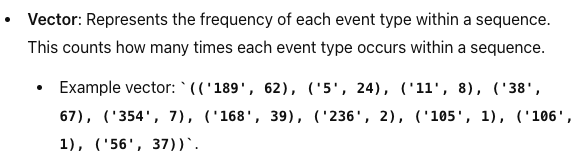

___

#### <font color = orchid> 4. Overlap Analysis

**<font color = lightpink>Output**

* Sequences labeled normal that also occur as anomalous: 0 (0.0%), 0 unique

* Sequences labeled anomalous that also occur as normal: 0 (0.0%), 0 unique

**<font color = lightpink>Explanation**
> This analysis checks for any overlap between normal and anomalous sequences. It verifies whether any sequence labeled as normal appears in the anomalous set and vice versa. In this case, there is no overlap.

___

#### <font color = orchid> 5. Common Sequences

**<font color = lightpink>Output**

* Common normal sequences:

    * 133: ('105',)
    
    * 65: ('189',)

    * 40: ('105', '105')
    
>><font color = green> Related Example - Reference Only 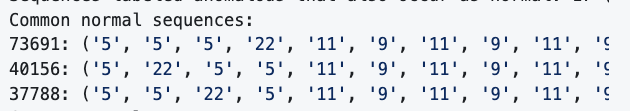

* Common anomalous sequences:

    * 8: ('106',)

    * 7: ('114',)

    * 7: ('114', '104')

>><font color = green> Related Example - Reference Only 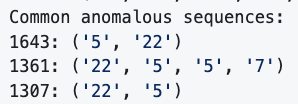    

**<font color = lightpink>Explanation**
> This section lists the most frequent sequences in normal and anomalous categories. The sequences are displayed along with their frequencies, showing the event types that appear most often.

> **133: ('105',) --> This means that the sequence consisting of a single event type 105 appears 133 times in the normal data**
>><font color = tomato>But this is an unusual instance as sequences are typically two and more
    
    >> This indicates that there are 133 sequences in the normal dataset where the event type 105 appears exactly once.
    
> **40: ('105', '105') --> This means that the sequence consisting of two consecutive event types 105 appears 40 times in the normal data.**

>>> 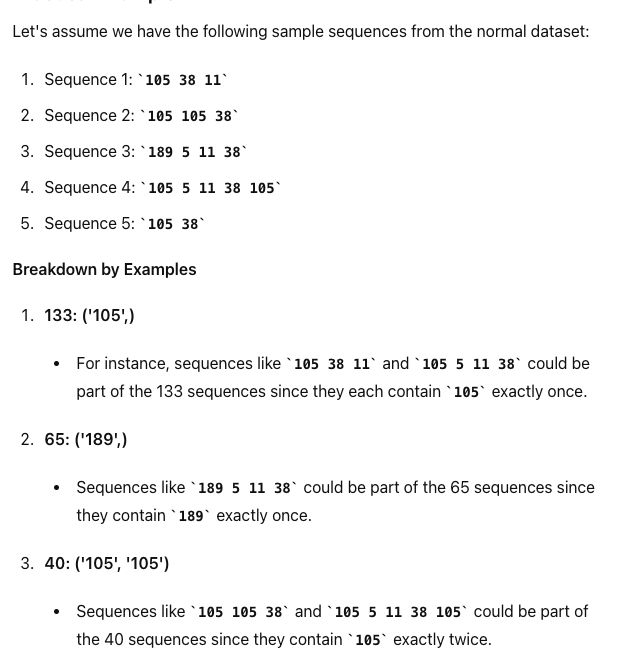
___

#### <font color = orchid> 6. Unique Count Vectors Analysis

**<font color = lightpink>Output**

* Unique count vectors: 2,938 (97.5% of unique sequences or 81.2% of all sequences)

* Unique count vectors normal: 2,155 (73.3%)

* Unique count vectors anomalous: 783 (26.7%)

**<font color = lightpink>Explanation**
> Unique count vectors are based on the number of times each event type appears within a sequence. This part shows the unique count vectors for both normal and anomalous sequences, as well as the overall unique count vectors.
    
>>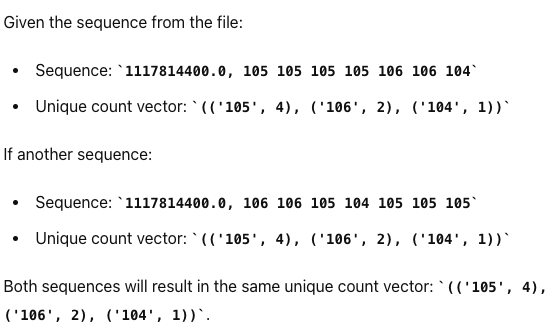

___

#### <font color = orchid> 7. Count Vectors Overlap Analysis

**<font color = lightpink>Output**

* Count vectors labeled normal that also occur as anomalous: 0 (0.0%), 0 unique

* Count vectors labeled anomalous that also occur as normal: 0 (0.0%), 0 unique

**<font color = lightpink>Explanation**
> Similar to the sequence overlap analysis, this part checks for overlaps in count vectors between normal and anomalous sequences, confirming there is no overlap in this case.

___

#### <font color = orchid> 8. Common Count Vectors

**<font color = lightpink>Output**

* Common normal count vectors:

    * 133: (('105', 1),)

    * 65: (('189', 1),)

    * 40: (('105', 2),)

>> <font color = green> Related Example - Reference Only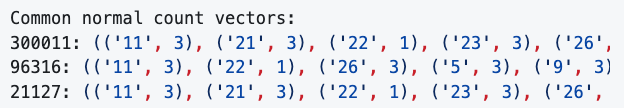
    
* Common anomalous count vectors:

    * 12: (('104', 1), ('114', 1))
    
    * 8: (('106', 1),)

    * 7: (('114', 1),)
    
>> <font color = green> Related Example - Reference Only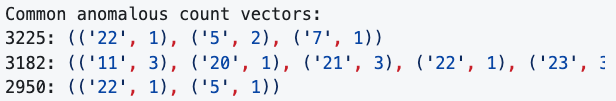

**<font color = lightpink>Explanation**
> This section identifies the most frequent count vectors in normal and anomalous sequences, listing them along with their frequencies.
    
> **133: --> This indicates that 133 sequences (out of the 3,618 total sequences) include the event '105' exactly once within the sequence**
    
> **(('105', 1),): --> This tuple specifies that the event '105' appears exactly once in each of these 133 sequences.**

>> 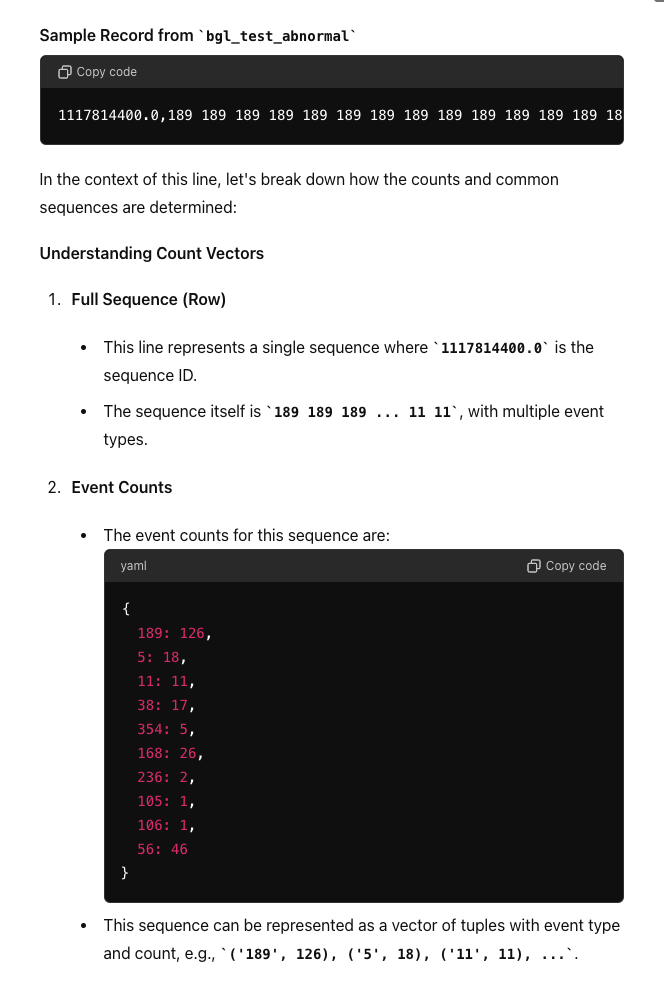
___

#### <font color = orchid> 9. Predictability Analysis

**<font color = lightpink>Output**

* Number of distinct events following any event in normal sequences: Average: 8.03 Stddev: 10.41

* Number of distinct events following any event in all sequences: Average: 9.57 Stddev: 15.07

>><font color = tomato>Related Example - Reference Only: 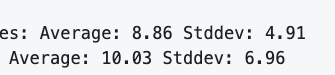    
    
**<font color = lightpink>Explanation**
> This part evaluates the predictability of events by examining the number of distinct events that can follow any given event. It provides the average and standard deviation for normal sequences and all sequences.

><font color = orange> For each event, it counts how many distinct events can follow it.
For example, if event A is followed by events B, C, and D in different instances, the count of distinct following events for A would be 3.

**Average:**

> Normal Sequences (8.03):

>>On average, each event in a normal sequence can be followed by approximately 8 different events.

>>This implies a moderate level of predictability: while there are some choices for what event follows, it is not highly diverse.

> All Sequences (9.57):

>> When considering all sequences (both normal and anomalous), the average number of distinct events following any given event increases to approximately 9.57.

>><font color = red>This suggests that anomalous sequences introduce more variability, making the sequences slightly less predictable.

**Standard Deviation:**

> Normal Sequences (10.41):

>> The standard deviation of 10.41 indicates that there is significant variability in the number of distinct events that can follow any given event in normal sequences.
    
>> For normal sequences, 10.41 is more than the mean (8.03), indicating high variability.

>><font color = tomato> So, approximately 68% of the data points will have the number of distinct events following any given event falling between 0 and 18.44

>> Some events might have very few possible next events, while others could have many.

> All Sequences (15.07):

>>The higher standard deviation of 15.07 for all sequences shows even greater variability when anomalous sequences are included.
    
>> For all sequences, 15.07 is also more than the mean (9.57), indicating even higher variability.

>>This further supports the idea that anomalies introduce more unpredictability into the sequences.    
___

#### <font color = orchid> 10. Lempel-Ziv Complexity

**<font color = lightpink>Output**

* Processed events: 4,747,963

* Lempel-Ziv complexity: 107,947
    
>><font color = tomato>This is the count of unique substrings found in these sequences.

**<font color = lightpink>Explanation**
> Lempel-Ziv complexity is a measure of the complexity of sequences based on the number of unique substrings. It indicates how diverse the sequences are in terms of unique patterns.
    
>><font color = blue> Note 4,747,963 is the count of rows in the raw dataset. The is mapped to the template file to assign the event_type, for which there is only 1 per row. Hence, the count of processed events = num or rows 

>>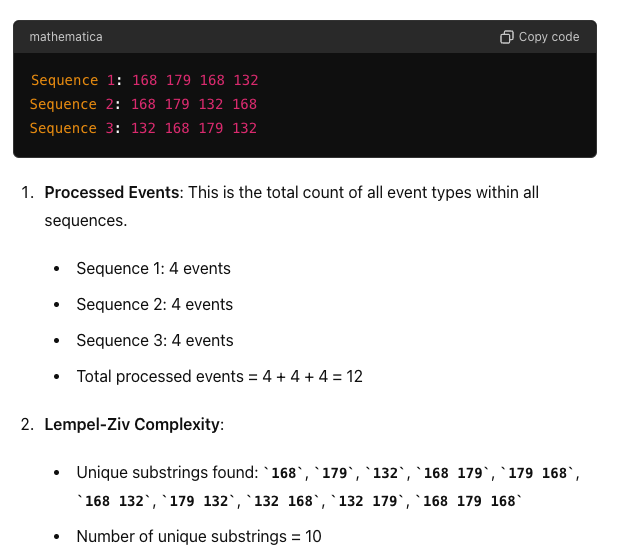
___

#### <font color = orchid> 11. Lempel-Ziv-Welch Compression

**<font color = lightpink>Output**

* Number of bits to represent all sequences before encoding: 42,731,667.0

* Number of bits to represent all sequences after encoding: 1,877,818.0

* Compression ratio: 95.61%

**<font color = lightpink>Explanation**
> This section measures the efficiency of compressing the sequences using the Lempel-Ziv-Welch algorithm. It compares the number of bits required before and after encoding, indicating the compression ratio achieved.

>><font color = teal>The LZW algorithm is a lossless data compression algorithm that works by replacing repeated sequences (or patterns) with shorter codes. Here's how it applies to your data and what the output values mean.
    
>>> For instance, if each event type requires 8 bits and there are 5,341,458 event types in total, the total number of bits would be 8 * 5,341,458.
___

#### <font color = orchid> 12. Entropy of n-grams

**<font color = lightpink>Output**

* n=1: Number of 1-grams: 394, H=4.31, H_norm=0.5

* n=2: Number of 2-grams: 3,520, H=4.78, H_norm=0.28

* n=3: Number of 3-grams: 8,977, H=5.04, H_norm=0.19

**<font color = lightpink>Explanation**

><font color = blue> Entropy quantifies the average amount of information or uncertainty in the n-grams
    
> i.e Entropy measures the randomness or information content in sequences. This section calculates the entropy for different lengths of n-grams (subsequences of length n) and normalizes it to provide insights into the distribution and complexity of the sequences.
    
> <font color = blue>n-gram: A contiguous sequence of n items (in this case, event types) from a given dataset.

>>1-gram: Single event type (e.g., 168).

>>2-gram: Sequence of two event types (e.g., 168 179).
    
>>3-gram: Sequence of three event types (e.g., 168 179 132).

><font color = blue> Entropy (H): A measure of the average information content or uncertainty in the n-grams.

>> Higher entropy indicates more randomness or unpredictability.

>> Lower entropy indicates more predictability and less variability.

>> Normalized Entropy (H_norm): Entropy value normalized to a scale between 0 and 1.

>>> Helps compare entropy values across different datasets or n-gram lengths.

**394 1-grams makes sense as it matches the number of templates**

>>> 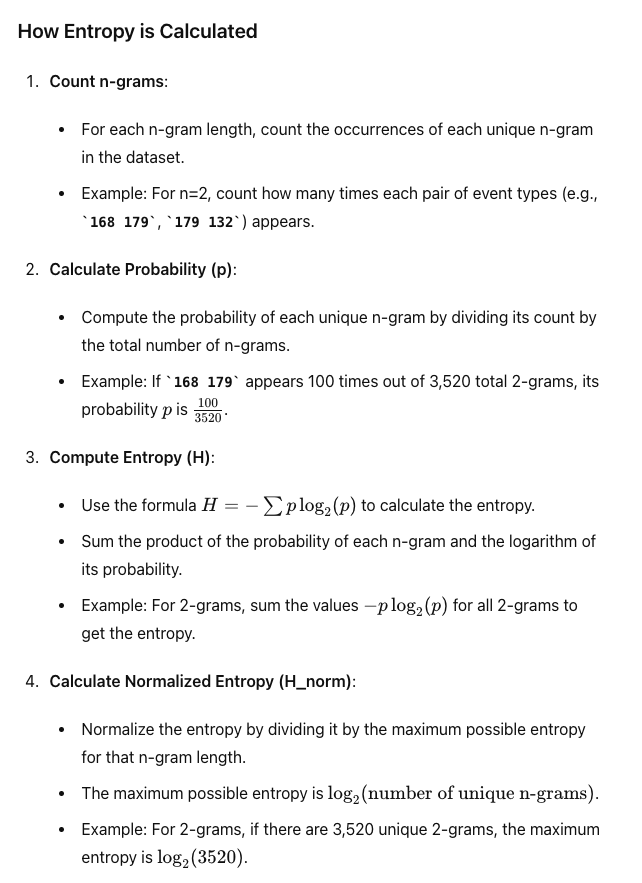

>>>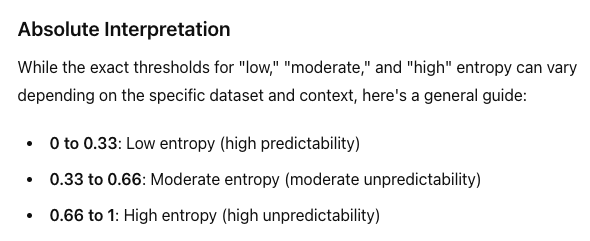    

___

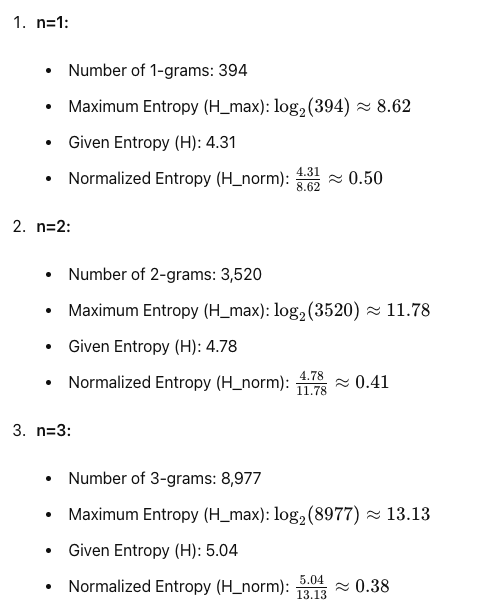

**These calculations confirm the normalized entropy values, showing that for 1-grams, the sequences have about 50% of the maximum possible entropy, indicating moderate unpredictability. For 2-grams and 3-grams, the normalized entropy values decrease, suggesting that as the length of the n-grams increases, the sequences become more predictable. ​**

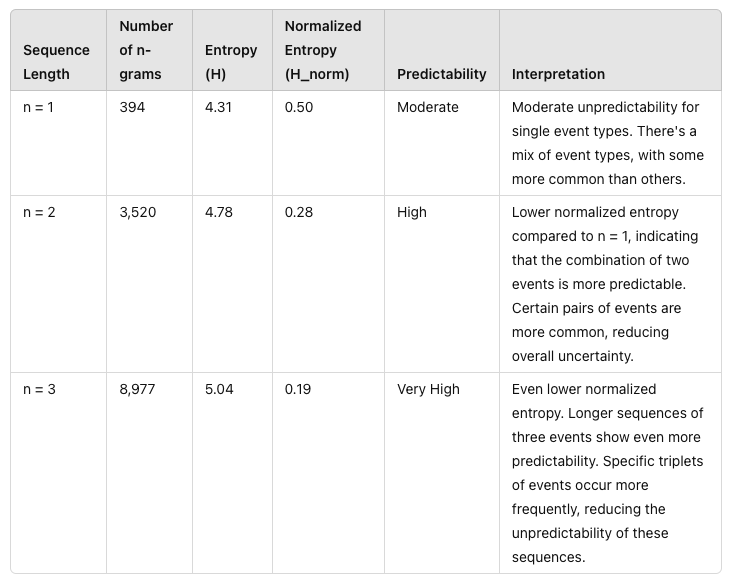

# <font color = darkkhaki> 5. Evaluation
    
## <font color = lightsteelblue> Install Libraries

In [41]:
# Start timing
start_time = time.time()

!pip install python-Levenshtein
!apt-get update
!apt-get install -y build-essential
!pip install pylcs

end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)

  Using cached python_Levenshtein-0.25.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached Levenshtein-0.25.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.3 kB)
  Using cached rapidfuzz-3.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached python_Levenshtein-0.25.1-py3-none-any.whl (9.4 kB)
Using cached Levenshtein-0.25.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (177 kB)
Using cached rapidfuzz-3.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.4 MB)
Get:1 http://archive.ubuntu.com/ubuntu jammy InRelease [270 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]        
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/main amd64 Packages [1792 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy/restricted amd64 Packages [164 k

## <font color = lightsteelblue> Sequence Based Detection

In [42]:
# Start timing
start_time = time.time()

!python3 evaluate.py --data_dir bgl_cfdr --time_detection True

end_time = time.time()
duration = end_time - start_time
print("\n" + "_"*100)
print(f"\nTime taken: {duration:.2f} seconds")
print("\n" + "_"*100)


New event detection
 Time=0.034952402114868164
 TP=829
 FP=219
 TN=338
 FN=4
 TPR=R=0.9951980792316927
 FPR=0.39317773788150806
 TNR=0.6068222621184919
 P=0.791030534351145
 F1=0.8814460393407761
 ACC=0.839568345323741
 MCC=0.6849637207366914

Sequence length detection
 Time=0.00033926963806152344
 TP=1
 FP=2
 TN=555
 FN=832
 TPR=R=0.0012004801920768306
 FPR=0.003590664272890485
 TNR=0.9964093357271095
 P=0.3333333333333333
 F1=0.0023923444976076554
 ACC=0.4
 MCC=-0.02523960709503113

New events + sequence length detection
 Time=0.03529167175292969
 TP=830
 FP=219
 TN=338
 FN=3
 TPR=R=0.9963985594237695
 FPR=0.39317773788150806
 TNR=0.6068222621184919
 P=0.7912297426120114
 F1=0.8820403825717322
 ACC=0.8402877697841726
 MCC=0.6870075162022107

Count vector clustering
 Threshold=0.01
 Time=48.83714294433594
 TP=824
 FP=470
 TN=87
 FN=9
 TPR=R=0.9891956782713085
 FPR=0.8438061041292639
 TNR=0.1561938958707361
 P=0.6367851622874807
 F1=0.7748001880582981
 ACC=0.6553956834532374
 MCC=0.28

## <font color = lightsteelblue> Event Based Detection

In [40]:
# # Start timing
# start_time = time.time()

# !python3 evaluate_events.py --data_dir bgl_cfdr

# end_time = time.time()
# duration = end_time - start_time
# print("\n" + "_"*100)
# print(f"\nTime taken: {duration:.2f} seconds")
# print("\n" + "_"*100)